In [102]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

import ml_utils

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [103]:
#Please change to your name.
name = "Lucas Riehl"

#Please use this to control EDA. 
show_eda = False


In [104]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
212,1,0.008,0.453,0.216,0.574,0.743,0.941,0.923,0.186,0.956,...,0.229,0.613,0.140,0.960,0.986,0.386,0.946,0.422,0.211,0.130
84,1,0.532,0.568,0.808,0.986,0.946,0.020,0.623,0.273,0.134,...,0.463,0.100,0.117,0.716,0.656,0.563,0.852,0.391,0.240,0.232
223,1,0.890,0.340,0.449,0.687,0.468,0.074,0.099,0.430,0.406,...,0.571,0.437,0.614,0.197,0.796,0.892,0.116,0.344,0.646,0.722
115,0,0.830,0.321,0.110,0.893,0.282,0.338,0.193,0.495,0.173,...,0.339,0.167,0.326,0.359,0.414,0.728,0.539,0.281,0.220,0.848
176,0,0.629,0.626,0.583,0.805,0.049,0.028,0.643,0.078,0.124,...,0.174,0.394,0.951,0.064,0.063,0.988,0.637,0.853,0.399,0.120


In [105]:
show_eda = ml_utils.edaDF(df,"target")
print(show_eda.giveTarget())

target


In [106]:
show_eda.fullEDA(k=1.5, scatterplot=False, optional_countplots=True, optional_histplots=False)

### Starting

For this assignment, you have a small training set, so combatting overfitting is key in being accurate!

In [ ]:
#df.shape

#### Do Modelling Stuff

Make a tree model (of some vareity) and make it fit well. Keep in mind the possibility of your tree overfitting, and think of steps you may need to combat that shoudl it occur. 

4
Training Accuracy: 0.8663101604278075
Testing Accuracy: 0.5396825396825397


[Text(0.41304347826086957, 0.9, 'var_177 <= -1.112\ngini = 0.5\nsamples = 187\nvalue = [91, 96]\nclass = True'),
 Text(0.17391304347826086, 0.7, 'var_5 <= 0.943\ngini = 0.251\nsamples = 34\nvalue = [5, 29]\nclass = True'),
 Text(0.08695652173913043, 0.5, 'var_122 <= -1.485\ngini = 0.067\nsamples = 29\nvalue = [1, 28]\nclass = True'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]\nclass = True'),
 Text(0.2608695652173913, 0.5, 'var_172 <= -0.487\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = False'),
 Text(0.21739130434782608, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = True'),
 Text(0.30434782608695654, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = False'),
 Text(0.6521739130434783, 0.7, 'var_3 <= -0.618\ngini = 0.492\nsamples = 153\nvalue = [86, 67]\nclass = False'),
 Text(0.4782608695652174, 0.5, 'var_100 <= 0.422\ngini = 0.435\nsamples = 47

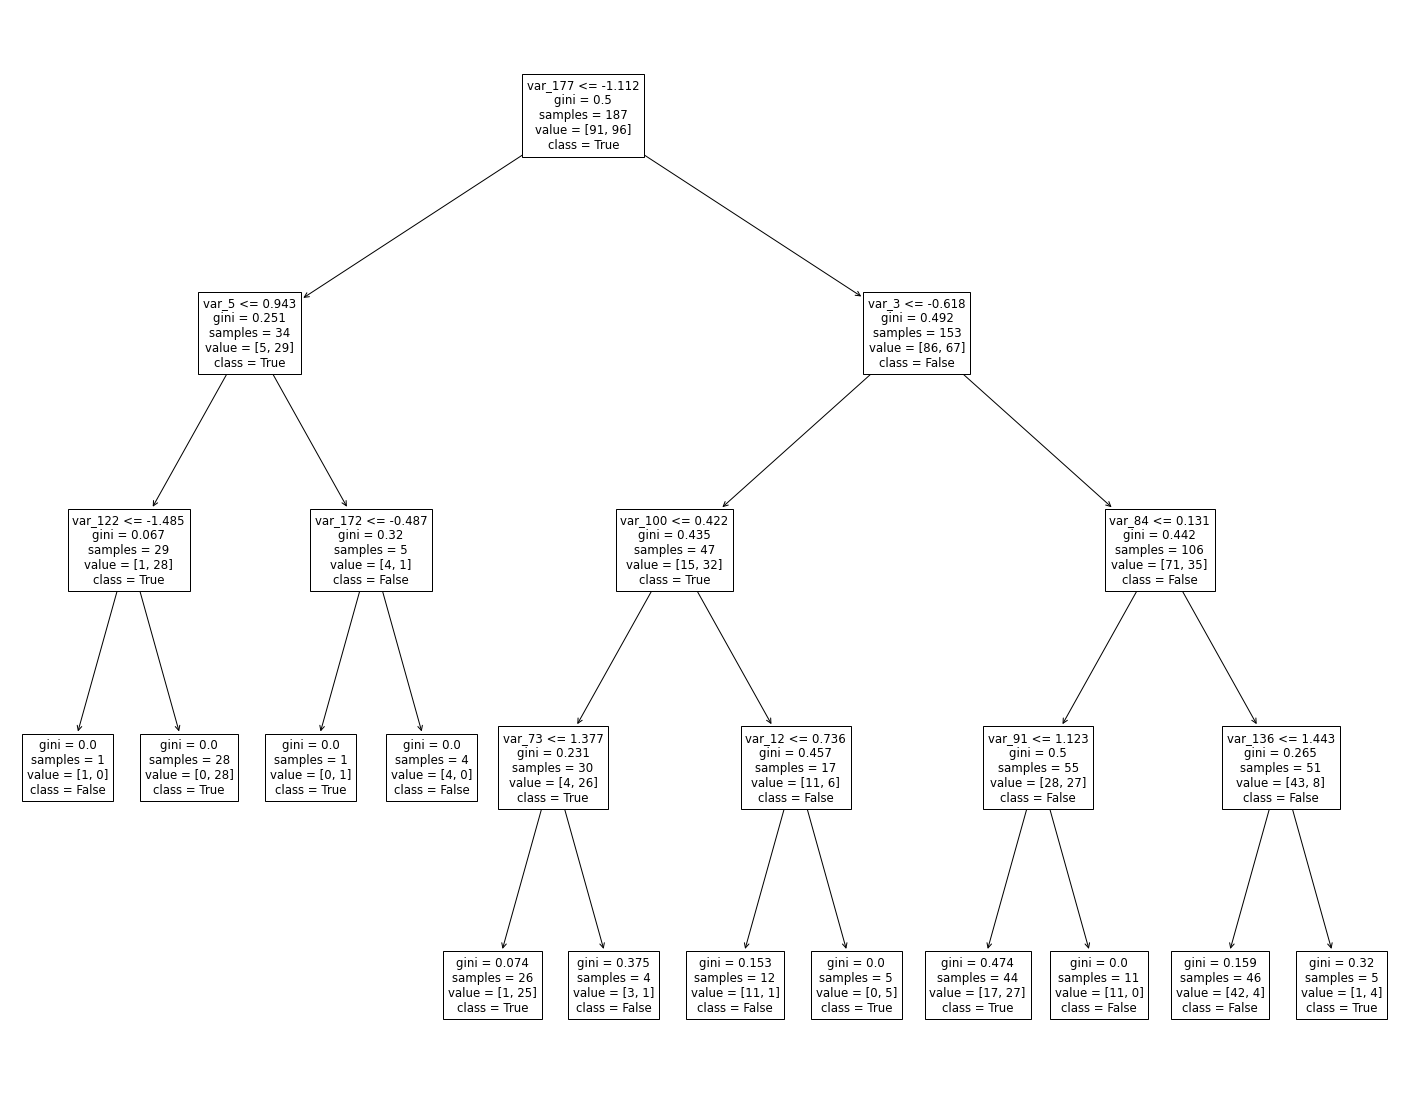

In [ ]:
#Split data as normal
y = np.array(df["target"]).reshape(-1,1)
X = np.array(df.drop(columns={"target"}))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Build pipeline
pipeline_steps = [('scaler', StandardScaler()),('DT', DecisionTreeClassifier(max_depth=4)) ]
pipe = Pipeline(pipeline_steps)

pipe.fit(X_train, y_train)

# Access the decision tree object within the pipeline
dt = pipe.named_steps['DT']

# Call the get_depth() method on the decision tree object
print(dt.get_depth())

print("Training Accuracy:", pipe.score(X_train, y_train))
print("Testing Accuracy:", pipe.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(dt, feature_names=df.columns[:-1], class_names=["False","True"])

### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [ ]:
print(best.score(X_test, y_test))
print(best)

NameError: name 'best' is not defined

### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [ ]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))


### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<ul>
<li>
<li>
</ul>